In [1]:
# import json
import pandas as pd
import generatefeatures as gf
import matcher as mc
import thresholdtester as tt
import numpy as np

json_files = ['D:/Acads/BTP/Code/final/Datasets/FVC2002_DB1_A_fingernet.json']
df = pd.read_json(json_files[0],orient='records')

fea = gf.generatefeatures(df)


Text(0, 0.5, 'array match threshold')

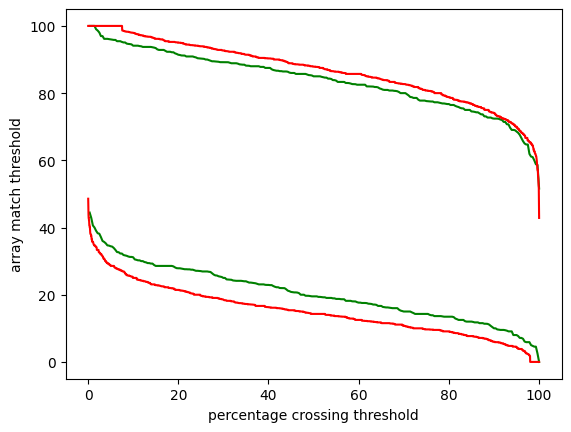

: 

In [2]:
# plot trarr and faarr on a line graph
# points are (trarr[i], i/len(trarr)) and (faarr[j], j/len(faarr))
# label the graphs separately
import matplotlib.pyplot as plt

# label this graph true and make it green in colour


threshold1 = 0.3
threshold2 = 3

array = mc.match(fea, threshold1, threshold2)


trarr = []
faarr = []
for i in range(len(array)):
    if array[i][0]:
        trarr.append(array[i][1])
    else:
        faarr.append(array[i][1])

# sort the arrays based on score column in increasing order
trarr.sort()
faarr.sort()

x = []
for i in range(len(trarr)):
    x.append(100 *(1 - i/len(trarr)))

plt.plot(x, trarr, label='True', color='green')
plt.xlabel('percentage crossing threshold')
plt.ylabel('array match threshold')



x = []
for i in range(len(faarr)):
    x.append(100 *(1 - i/len(faarr)))

plt.plot(x, faarr, label='False', color='red')
plt.xlabel('percentage crossing threshold')
plt.ylabel('array match threshold')


threshold1 = 0.3
threshold2 = 0.2

array = mc.match(fea, threshold1, threshold2)


trarr = []
faarr = []
for i in range(len(array)):
    if array[i][0]:
        trarr.append(array[i][1])
    else:
        faarr.append(array[i][1])

# sort the arrays based on score column in increasing order
trarr.sort()
faarr.sort()

x = []
for i in range(len(trarr)):
    x.append(100 *(1 - i/len(trarr)))

plt.plot(x, trarr, label='True', color='green')
plt.xlabel('percentage crossing threshold')
plt.ylabel('array match threshold')



x = []
for i in range(len(faarr)):
    x.append(100 *(1 - i/len(faarr)))

plt.plot(x, faarr, label='False', color='red')
plt.xlabel('percentage crossing threshold')
plt.ylabel('array match threshold')